<a href="https://colab.research.google.com/github/SarvaJyoshna/Keyword-Extraction-with-BERT/blob/main/Keyword_Extraction_with_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install praw

In [ ]:
from transformers import TFAutoModelForTokenClassification, AutoTokenizer 
from matplotlib import pyplot as plt 
import tensorflow as tf 
import praw 
import pandas as pd 
import wordcloud
import numpy as np 

In [ ]:
model = TFAutoModelForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english") 
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased") 

Some layers from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing TFBertForTokenClassification: ['dropout_147']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForTokenClassification were not initialized from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english and are newly initialized: ['dropout_73']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
label_list = ["O", "B-MISC", "I-MISC", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC",  "I-LOC"]

In [ ]:
reddit = praw.Reddit(client_id='4sh9jtxWs3u7Ig', 
                     client_secret='gMr4BiX0dTlJMvWpYDxLYgW6Bgk6eQ',
                     user_agent='Jyoshna') 

In [ ]:
def replies_of(top_level_comment, comment_list):
    if len(top_level_comment.replies) == 0:
        return
    else:
        for num, comment in enumerate(top_level_comment.replies):
            try:
                comment_list.append(str(comment.body))
            except:
                continue
            replies_of(comment, comment_list)

In [ ]:
count = 0
master_dict = {'I-LOC': [], 'I-ORG': [], 'I-PER': [], 'B-LOC': [], 'B-ORG': [], 'B-PER': []} #BERT recognised tags for its pre trained vocabulary
word_temp = ''
current_tag = ''
old_tag = ''
print_dict = {}

In [ ]:
list_of_subreddit = ['news']

In [ ]:
for j in list_of_subreddit:   
    top_posts = reddit.subreddit(j).top('month', limit=1) 
    comment_list=[]
    for submission in top_posts:
        submission_comm = reddit.submission(id=submission.id)
        print("Title:",submission.title)
        print('\n')
        comment_list.append(str(submission.title))

        for count, top_level_comment in enumerate(submission_comm.comments):
            try:
                replies_of(top_level_comment, comment_list)
            except:
                continue
            
print("The Extracted comments are as follows:\n")
print(comment_list)
print("\nLength of the comment list:\n")
print(len(comment_list))

Title: Joe Biden elected president of the United States


The Extracted comments are as follows:

['Joe Biden elected president of the United States', 'Fox News called it almost 20 minutes after everyone else lol', 'True, but they were the *first* outlet to move Joe from 253 up to 264 by calling AZ for Joe, and for the life of me I am unable to deduce why.', "Aren't the people making those decisions fairly independent?", "They are. They're polling is very high quality. Calling Arizona early was kinda irresponsible tho.", 'The ABC in Australia also called it. \n\nApparently Fox calling Arizona pissed Trump off to high heavens lol.', "Australia's ahead in time. That's why.", 'Jared called to yell at FOX and get them to take it back', "But they never took it back. The [LA Times](https://www.latimes.com/entertainment-arts/business/story/2020-11-05/fox-news-arnon-mishkin-election-2020-arizona-trump-biden) has a pretty good rundown of the nuts and bolts. But even though Fox News decision des

In [ ]:
for sequence in comment_list:
    if len(sequence) > 512: 
        continue
    
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))
    print("\nTokens are as follows:\n")
    print(tokens)
    inputs = tokenizer.encode(sequence, return_tensors="tf") #coverts token arrays into tensors
    print("\nInputs are as follows:\n")
    print(inputs)
    outputs = model(inputs)[0]
    print("\nOutputs are as follows:\n")
    print(outputs)
    predictions = tf.argmax(outputs, axis=2) 


    list_bert = [(token, label_list[prediction]) for token, prediction in zip(tokens, predictions[0].numpy())] 
    print("\nThis is the list_bert:\n")
    print(list_bert)


    for i in list_bert:
        if i[1] in ['O', 'B-MISC', 'I-MISC']:
            # print('in if')
            if len(current_tag) > 0:
                without_space_word = word_temp.strip()
                if len(without_space_word) > 1:
                    master_dict[current_tag].append(without_space_word)
            count = 0
            word_temp = ''
            current_tag = ''
            continue
        else:
            current_tag = i[1]

            if old_tag != current_tag and len(old_tag) > 0:
                without_space_word = word_temp.strip()
                if len(without_space_word) > 1:
                    master_dict[old_tag].append(without_space_word)
                count = 0
                word_temp = ''
                current_tag = ''

            if i[0].startswith('##'): 
                word_temp += i[0][2:].upper()
            elif i[1] in ['I-PER', 'I-ORG', 'I-LOC', 'B-LOC', 'B-ORG', 'B-PER']:
                word_temp += " " + i[0].upper()
                current_tag = i[1]
                count += 1
            old_tag = current_tag

Streaming output truncated to the last 5000 lines.
   -1.9082297  -0.14800216 -2.0993688  -0.7455608 ]
  [11.632161   -2.145692   -0.9891241  -2.4806218  -1.2928457
   -1.9707869  -0.49999678 -2.0351238  -0.6799783 ]
  [11.76629    -2.32299    -0.89045954 -2.5299954  -1.4516466
   -1.9069856  -0.5754421  -2.015222   -0.93683094]
  [11.694829   -2.2616463  -1.013618   -2.4990473  -1.3391212
   -1.8571888  -0.5306531  -1.962557   -0.94309783]
  [11.380705   -2.248722   -1.0735179  -2.5139854  -1.3323762
   -1.8703297  -0.2154063  -2.0121434  -0.75199986]
  [11.54738    -2.2954605  -0.68884796 -2.4869123  -1.169951
   -2.1146472  -0.35246703 -1.9702506  -0.77769166]
  [11.806735   -2.328126   -1.17131    -2.4988835  -1.2982816
   -1.863402   -0.2808119  -1.9857286  -0.5248696 ]
  [11.7075815  -2.3659775  -1.0762997  -2.5346363  -1.2270601
   -1.9145123  -0.3350765  -1.890484   -0.4162958 ]
  [11.407515   -2.369334   -0.2019125  -2.9434648  -1.0337216
   -2.084606   -0.3815409  -2.1695826 

In [ ]:
print("The keywords that we found along with duplication are as follows:\n")
print(master_dict)
print_dict['Location']=list(set(master_dict['I-LOC']+master_dict['B-LOC']))
print_dict['Organisation']=list(set(master_dict['I-ORG']+master_dict['B-ORG']))
print_dict['Person Name']=list(set(master_dict['I-PER']+master_dict['B-PER']))

print("\nI-LOC\n")
print(master_dict['I-LOC'])
print("\nB-LOC\n")
print(master_dict['B-LOC'])
print("\nI-ORG\n")
print(master_dict['I-ORG'])
print("\nB-ORG\n")
print(master_dict['B-ORG'])
print("\nI-PER\n")
print(master_dict['I-PER'])
print("\nB-PER\n")
print(master_dict['B-PER'])

The keywords that we found along with duplication are as follows:

{'I-LOC': ['UNITED STATES', 'AZ', 'ARIZONA', 'AUSTRALIA', 'ARIZONA', 'AUSTRALIA', 'ARIZONA', 'STONE OCEAN', 'NEVADA', 'NEVADA', 'ARIZONA', 'PENNSYLVANIA', 'ARIZONA', 'NY', 'PA', 'GE', 'ORGIA', 'NSYLVANIA', 'FLORIDA', 'UNITED STATES OF AMERICA', 'WHITE HOUSE', 'PITTSBURGH', 'USA', 'DC', 'PITTSBURGH', 'WHITE HOUSE', 'CHICAGO', 'NYC', 'INDIANA', 'OHIO', 'DC', 'PHILLY', 'SEATTLE', 'ALABAMA', 'DC', 'MARYLAND', 'NYC', 'MICHIGAN', 'PARIS', 'AMERICA', 'GA', 'PA', 'OREGON', 'CHICAGO', 'ITALY', 'USA', 'CHICAGO', 'LA', 'NY', 'SF', 'NY', 'PHILLY', 'DC', 'SPRINGFIELD OHIO', 'OHIO', 'SPARTANBURG', 'SC', 'DC', 'CHICAGO', 'CASTRO', 'SF', 'NEW YORK', 'WHITE HOUSE', 'NY', 'RUSSIA', 'AMERICA', 'PENNSYLVANIA', 'GEORGIA', 'DETROIT', 'PHILADELPHIA', 'PITTSBURG', 'MADISON', 'DETROIT', 'PENNSYLVANIA', 'GEORGIA', 'GEORGIA', 'FLORIDA', 'GEORGIA', 'FLORIDA', 'FLORIDA', 'OH', 'FL', 'AZ', 'GA', 'FLORIDA', 'OHIO', 'FL', 'FL', 'FL', 'PA', 'AZ', 'GEOR

In [ ]:
print("All keywords without duplication and categorising them into Location, Organization and Person Name\n")
print("Location:")
print(print_dict['Location'])
print("\nOrganisation:")
print(print_dict['Organisation'])
print("\nPerson Name:")
print(print_dict['Person Name'])

All keywords without duplication and categorising them into Location, Organization and Person Name

Location:
['NY', 'SEATTLE', 'SPRINGFIELD OHIO', 'PHILLY', 'OH', 'ITALY', 'DETROIT', 'SPARTANBURG', 'CANADA', 'GE', 'PITTSBURGH', 'RUSSIA', 'PA', 'TEXAS', 'LA', 'FRANCONIA', 'NEW ZEALAND', 'SWITZERLAND', 'ARIZONA', 'PENNSYLVANIA', 'POLAND', 'DC', 'NSYLVANIA', 'BOSNIA & HERZEGOVINA', 'MARYLAND', 'CHICAGO', 'GEORGIA', 'INDIANA', 'AMERICA', 'ROMANIA', 'UNITED STATES OF AMERICA', 'FL', 'STONE OCEAN', 'FLORIDA', 'OREGON', 'SC', 'PHILADELPHIA', 'UK', 'UNITED STATES', 'MICHIGAN', 'CALI', 'ALABAMA', 'AUSTRALIA', 'PLANO', 'PHILIPPINES', 'OHIO', 'GERMANY', 'GA', 'NYC', 'USA', 'PITTSBURG', 'HONG KONG', 'NEVADA', 'PARIS', 'MADISON', 'SF', 'WHITE HOUSE', 'ORGIA', 'NEW YORK', 'CASTRO', 'AZ']

Organisation:
['CR', 'USPS', 'REDDIT', 'TEA PARTY', 'TWITTER', 'FAIR FIGHT !', 'PENNSYLVANIA GENERAL ASSEMBLY', 'JOE', 'FOX', 'WH', 'HOUSE', 'PARTY', 'IRS', 'PA', 'SAINTS', 'AP', 'CBS', 'BLUE', 'RADICAL CONSERVATI

In [ ]:
keywords = list(master_dict['I-LOC'] + master_dict['B-LOC'] + master_dict['I-ORG'] + master_dict['B-ORG'] + master_dict['I-PER'] + master_dict['B-PER'])
result_dict = {}

for keyword in keywords:
    if keyword not in result_dict:
      result_dict[keyword] = 1
    else:
      result_dict[keyword] += 1

print("All Keywords with their respective no. of occurrences:\n")
print(result_dict)

All Keywords with their respective no. of occurrences:

{'UNITED STATES': 2, 'AZ': 6, 'ARIZONA': 10, 'AUSTRALIA': 10, 'STONE OCEAN': 2, 'NEVADA': 4, 'PENNSYLVANIA': 6, 'NY': 8, 'PA': 8, 'GE': 2, 'ORGIA': 2, 'NSYLVANIA': 2, 'FLORIDA': 10, 'UNITED STATES OF AMERICA': 2, 'WHITE HOUSE': 10, 'PITTSBURGH': 4, 'USA': 8, 'DC': 12, 'CHICAGO': 8, 'NYC': 10, 'INDIANA': 2, 'OHIO': 6, 'PHILLY': 6, 'SEATTLE': 2, 'ALABAMA': 2, 'MARYLAND': 2, 'MICHIGAN': 2, 'PARIS': 2, 'AMERICA': 34, 'GA': 8, 'OREGON': 2, 'ITALY': 2, 'LA': 2, 'SF': 4, 'SPRINGFIELD OHIO': 2, 'SPARTANBURG': 2, 'SC': 2, 'CASTRO': 2, 'NEW YORK': 2, 'RUSSIA': 2, 'GEORGIA': 14, 'DETROIT': 4, 'PHILADELPHIA': 2, 'PITTSBURG': 2, 'MADISON': 2, 'OH': 2, 'FL': 8, 'CALI': 2, 'TEXAS': 2, 'PLANO': 2, 'PHILIPPINES': 2, 'UK': 2, 'CANADA': 4, 'HONG KONG': 2, 'FRANCONIA': 2, 'GERMANY': 2, 'BOSNIA & HERZEGOVINA': 2, 'NEW ZEALAND': 2, 'SWITZERLAND': 2, 'ROMANIA': 2, 'POLAND': 2, 'FOX NEWS': 8, 'ABC': 2, 'FOX': 12, 'TBF NEVADA': 2, 'ZA WARUDO': 2, 'MA': 2,

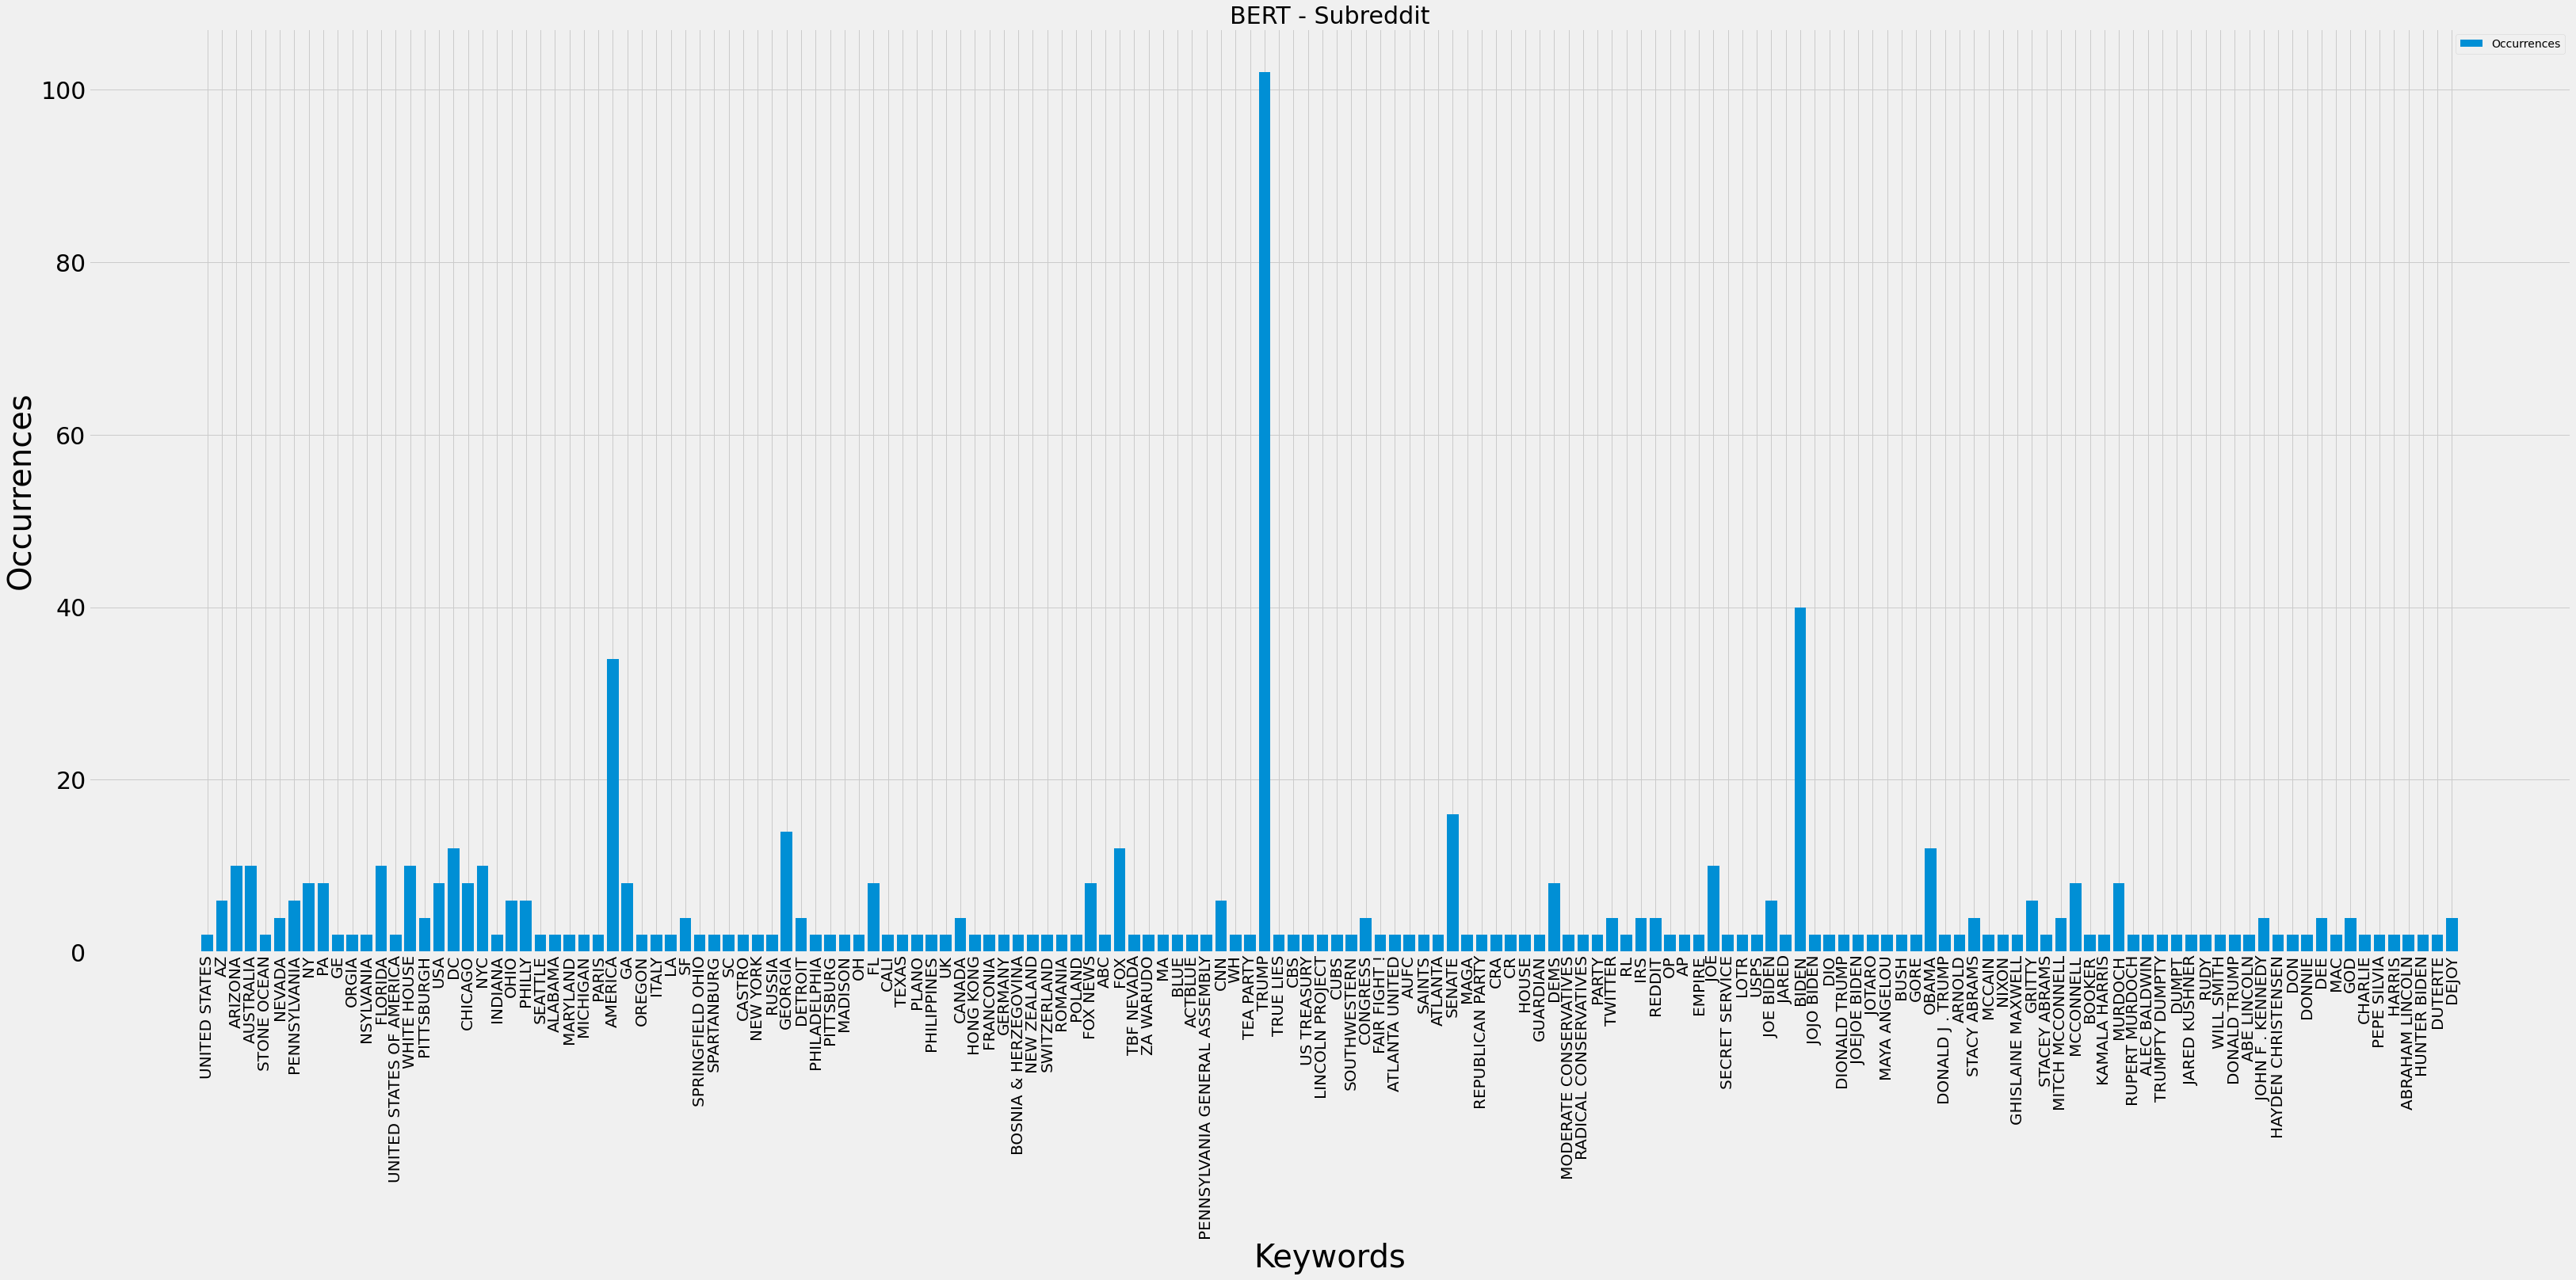

In [ ]:
width = 50
height = 20

x_axis = range(len(result_dict))

plt.style.use('fivethirtyeight')

plt.figure(figsize=(width,height))
plt.bar(x_axis,list(result_dict.values()),label="Occurrences")

plt.xticks(x_axis,list(result_dict.keys()), rotation=90, fontsize=20)
plt.yticks(fontsize=30)

plt.title("BERT - Subreddit",fontsize=30)
plt.xlabel("Keywords",fontsize=40)
plt.ylabel("Occurrences",fontsize=40)

plt.legend()

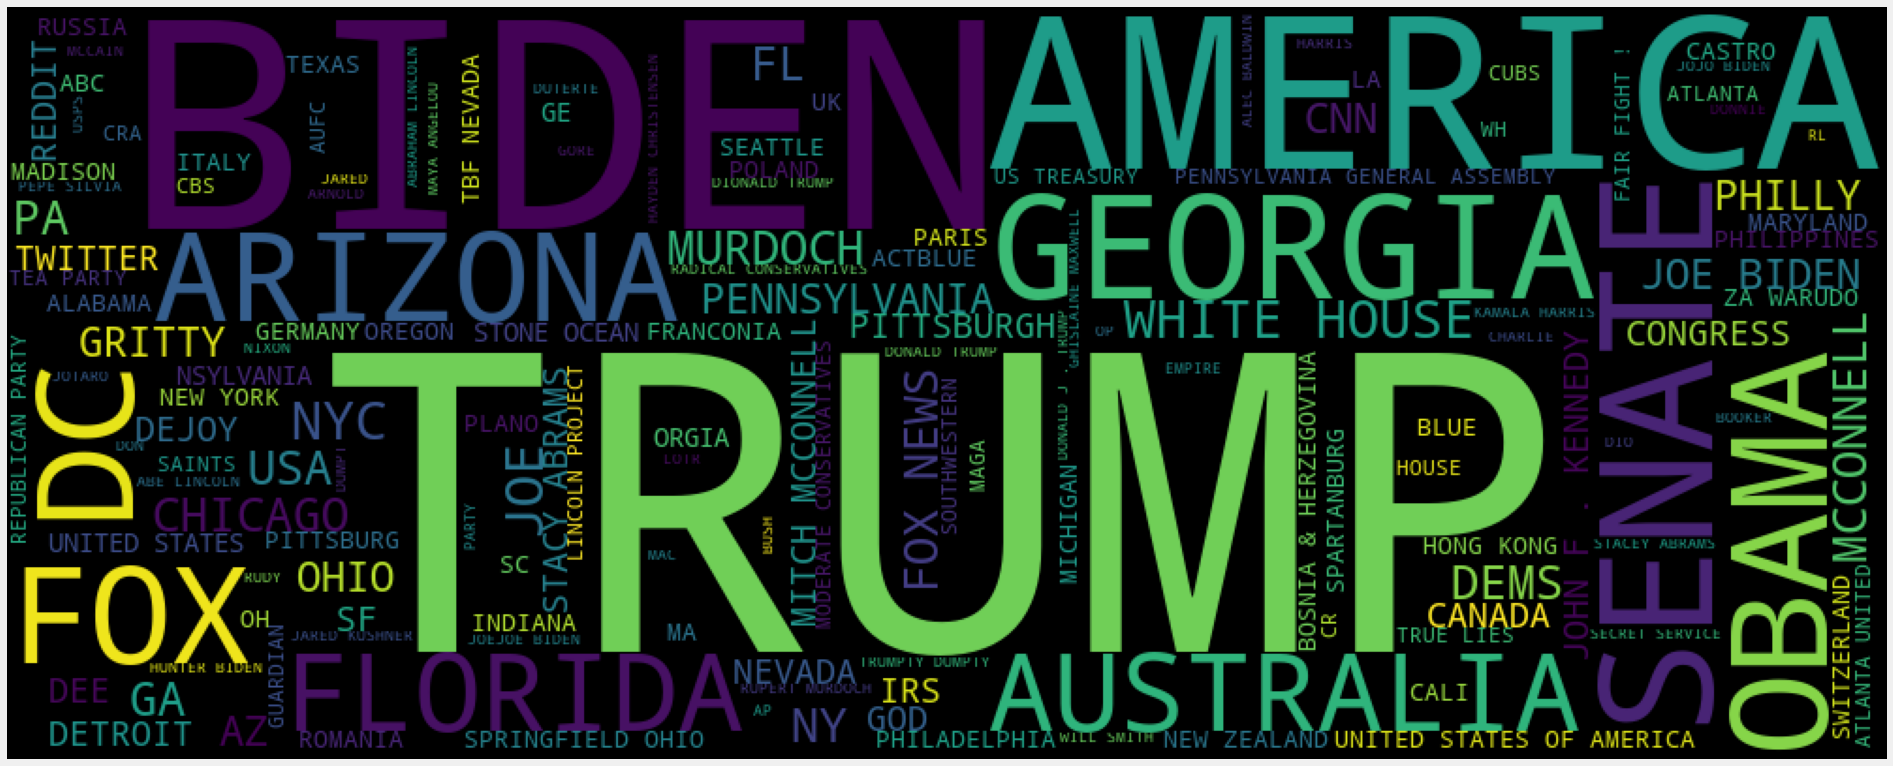

In [ ]:
cloud = wordcloud.WordCloud(width=1000, height=400)
cloud.generate_from_frequencies(result_dict)
plt.figure( figsize= (30,15))
plt.imshow(cloud)
plt.axis("off")
plt.show()

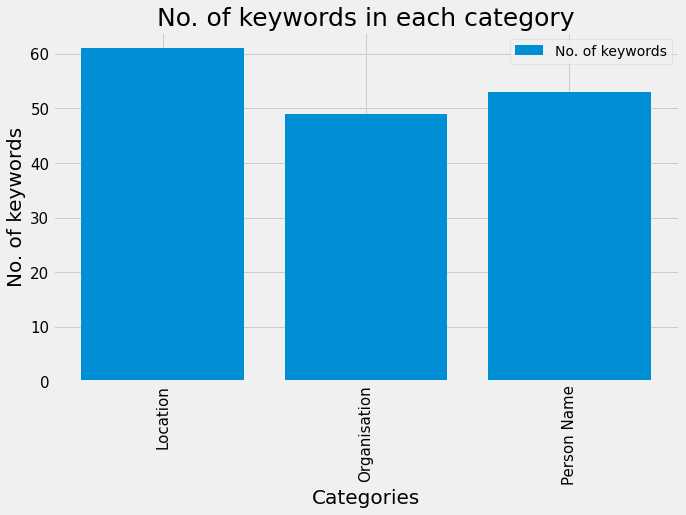

In [ ]:
print_dict['Location']=list(set(master_dict['I-LOC']+master_dict['B-LOC']))
print_dict['Organisation']=list(set(master_dict['I-ORG']+master_dict['B-ORG']))
print_dict['Person Name']=list(set(master_dict['I-PER']+master_dict['B-PER']))

loc_list = list(print_dict['Location'])
org_list = list(print_dict['Organisation'])
per_list = list(print_dict['Person Name'])

temp_dict={}

temp_dict['Location']=len(loc_list)
temp_dict['Organisation']=len(org_list)
temp_dict['Person Name']=len(per_list)

k_words=['Location','Organisation','Person Name']

width = 10
height = 6

x_axis = range(len(temp_dict))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(width,height))

plt.bar(x_axis,list(temp_dict.values()),label="No. of keywords")
plt.xticks(x_axis,list(temp_dict.keys()), rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.title("No. of keywords in each category",fontsize=25)
plt.xlabel("Categories",fontsize=20)
plt.ylabel("No. of keywords",fontsize=20)

plt.legend()

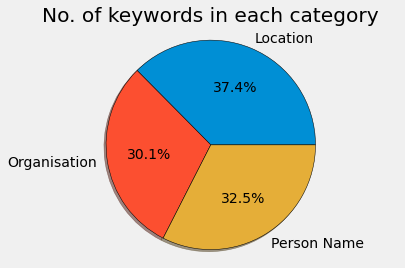

In [ ]:
# Creating dataset 
rd=list(temp_dict.values())

plt.pie(rd,labels=k_words,autopct='%1.1f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('No. of keywords in each category')
plt.axis('equal')
plt.show()